# Simulation 01

# Built-in R functions - Inverse cdf method - Intro Stan

# Josep Fortiana  2022-02-28

***
###### LaTeX macros
$\def\prob{P}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\DeclareMathOperator{\indep}{\perp\negthickspace\negthinspace\perp}$
***

# Exercise 05

Design, write the code for a generator of random numbers for the distribution with a triangular pdf described below, based on the inverse cdf transformation method.  
Assess the quality of your generator by comparing a histogram of generated with the theoretical pdf.

$$
    f(x)=\left\{\begin{array}{lll}
        0,       &\text{ if }    &x\notin[0,1]\\[0.25cm]
        4\,x,    &\text{ if }    &0\leq x<1/2,\\[0.25cm]
        4-4\,x,  &\text{ if }    &1/2\leq x<1,
    \end{array}\right.\mskip60mu x\in\R.
$$

# Solution 05

In [1]:
f<-function(x){
    ifelse(x<0,0,ifelse(x<0.5,4*x,ifelse(x<1,4-4*x,0)))
    }

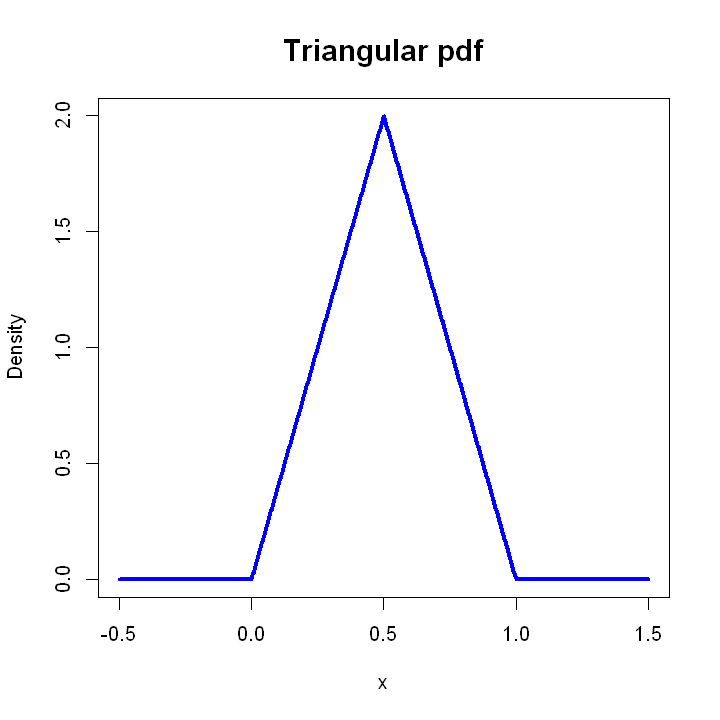

In [2]:
options(repr.plot.width=6,repr.plot.height=6)
x<-seq(-0.5,1.5,length=1000)
plot(x,f(x),type="l",lwd=3.5,col="blue",xlab="x",ylab="Density",main="Triangular pdf",cex.main=1.5)

#### cdf  for the triangular pdf

$$
    F(x)=\left\{\begin{array}{lll}
    0,                 &\text{ if }    &x<0,\\[0.25cm]
    2\,x^{2},          &\text{ if }    &0\leq x<1/2,\\[0.25cm]
    -1+4\,x-2\,x^{2},  &\text{ if }    &1/2\leq x<1,\\[0.25cm]
    1,                 &\text{ if }    &1\leq x,
    \end{array}\right.\mskip60mu x\in\R.
$$

In [3]:
F<-function(x){
    ifelse(x<0,0,ifelse(x<0.5,2*x^2,ifelse(x<1,-1+4*x-2*x^2,1)))
    }

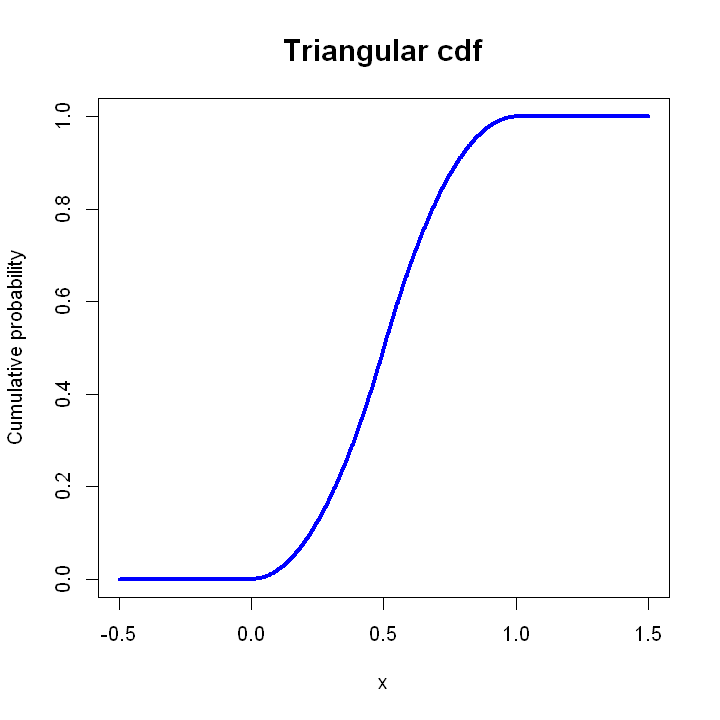

In [4]:
options(repr.plot.width=6,repr.plot.height=6)
x<-seq(-0.5,1.5,length=1000)
plot(x,F(x),type="l",lwd=3.5,col="blue",xlab="x",ylab="Cumulative probability",main="Triangular cdf",cex.main=1.5)

#### Quantile function for the triangular pdf

$$
    Q(y)=\left\{\begin{array}{lll}
    \sqrt{y/2},         &\text{ if }    &y\in(0,1/2),\\[0.25cm]
    1-\sqrt{(1-y)/2},   &\text{ if }    &y\in(1/2,1],
    \end{array}\right.\mskip50mu y\in(0,1]
$$

In [5]:
Q<-function(y){
    ifelse(y<0.5,sqrt(y/2),1-sqrt((1-y)/2))
    }

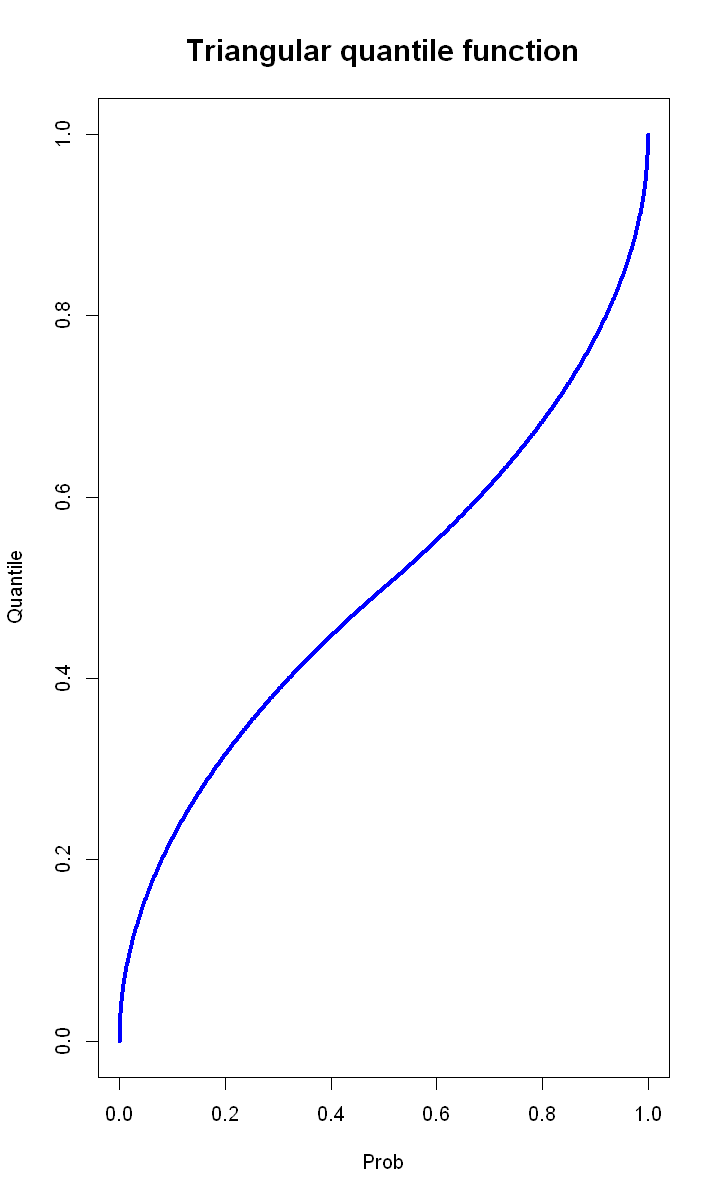

In [6]:
options(repr.plot.width=6,repr.plot.height=10)
y<-seq(0,1,length=1000)
plot(y,Q(y),type="l",lwd=3.5,col="blue",xlab="Prob",ylab="Quantile",main="Triangular quantile function",cex.main=1.5)

In [7]:
rtriang<-function(n){
    return(Q(runif(n)))
    }

In [8]:
n<-5.0e4
x<-rtriang(n)

In [9]:
str(x)

 num [1:50000] 0.471 0.506 0.649 0.496 0.612 ...


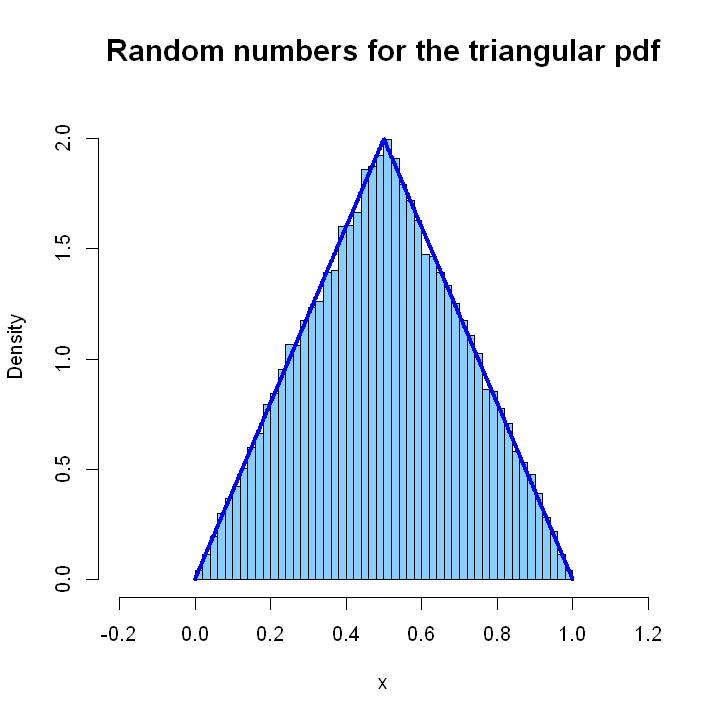

In [10]:
options(repr.plot.width=6,repr.plot.height=6)
hist(x,main="Random numbers for the triangular pdf",freq=FALSE,xlim=c(-0.2,1.2),ylim=c(0,2.1),nclass=70,col="LightSkyBlue",cex.main=1.5)
u<-seq(0,1,length=1000)
lines(u,f(u),lwd=3.5,col="blue")